# Anomaly detection
## Szymon szewczyk

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  

data = loadmat('ex8data1.mat')
X = data['X'].T
print(X.shape)

(2, 307)


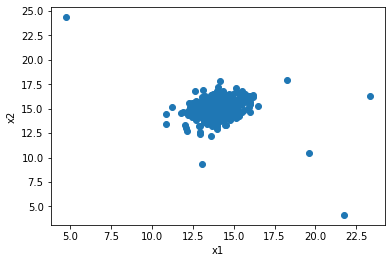

In [2]:
plt.scatter(X[0], X[1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

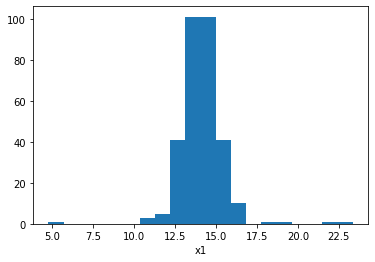

In [3]:
plt.hist(X[0], bins=20)
plt.xlabel("x1")
plt.show()

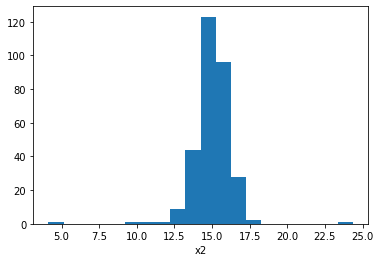

In [4]:
plt.hist(X[1], bins=20)
plt.xlabel("x2")
plt.show()

In [5]:
def estimate_gaussian(X):  
    mu = np.array([np.mean(X[0]),np.mean(X[1])])
    sigma = np.array([np.std(X[0]), np.std(X[1])])
    return mu, sigma

mean, sigma = estimate_gaussian(X)
print(mean, sigma)

[14.11222578 14.99771051] [1.35374717 1.3075723 ]


### Calculate probability

In [6]:
Xval = data['Xval'].T
yval = data['yval'].T
 
print(Xval.shape)
print(yval.shape)

(2, 307)
(1, 307)


In [7]:
from scipy import stats

prob_X1 = np.zeros((X.shape))
prob_X2 = np.zeros((X.shape))

prob_X1 = stats.norm.pdf(X[0,:], loc=mean[0], scale=np.sqrt(sigma[0]))
prob_X2 = stats.norm.pdf(X[1,:], loc=mean[1], scale=np.sqrt(sigma[1]))

# P = stats.norm.pdf(X, loc=np.array([mean[0], mean[1]]).T, scale=np.array([np.sqrt(sigma[0]), np.sqrt(sigma[1])]).T)
print(prob_X1[:5])
print(prob_X2[:5])

[0.22545823 0.28556744 0.34199349 0.27030008 0.30841758]
[0.34020932 0.19481118 0.26371991 0.20549115 0.24618534]


In [8]:
pval = np.zeros((Xval.shape[1], Xval.shape[1]))

pval[:,0] = stats.norm.pdf(Xval[0,:], loc=mean[0], scale=np.sqrt(sigma[0]))
pval[:,1] = stats.norm.pdf(Xval[1,:], loc=mean[1], scale=np.sqrt(sigma[1]))
print(pval[:5,0:2])

[[0.12119212 0.34809725]
 [0.31572846 0.33446095]
 [0.27798902 0.15163779]
 [0.30938503 0.23648579]
 [0.29359488 0.29864854]]


### Selecting the threshold

In [9]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 

    step = np.linspace(pval.min(), pval.max(), 10000)
    best_epsilon = 0
    best_f1 = 0

    for el in step:
        t = pval <= el
        y = np.logical_or(t[:,0], t[:,1])
        f1 = f1_score(y, yval.T)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = el

    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
print(best_epsilon, best_f1)

6.978313623558666e-05 0.8750000000000001


### Anomaly detection result

In [10]:
t1 = prob_X1 < best_epsilon
t2 = prob_X2 < best_epsilon

y = np.logical_or(t1, t2) + 0

anomalies = np.where(y == 1)
anomalies_points = np.zeros((anomalies[0].shape[0], X.shape[0]))

for i in range (0, anomalies[0].shape[0]):
    anomalies_points[i, 0] = X[0, anomalies[0][i]]
    anomalies_points[i, 1] = X[1, anomalies[0][i]]

print(anomalies_points)

[[13.07931049  9.34787812]
 [21.72713402  4.12623222]
 [19.58257277 10.411619  ]
 [23.33986753 16.29887355]
 [ 4.75261282 24.35040725]]


Text(0.5, 1.0, 'Found anomalies')

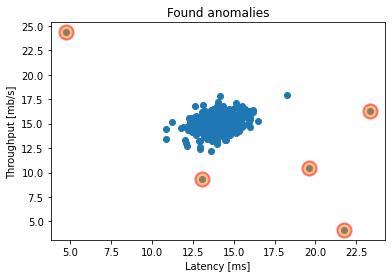

In [11]:
plt.scatter(X[0,:], X[1,:])
plt.scatter(anomalies_points[:,0], anomalies_points[:,1], s=200, alpha=0.5, edgecolors='r', linewidths=2)
plt.xlabel('Latency [ms]')
plt.ylabel('Throughput [mb/s]')
plt.title('Found anomalies')